## 경찰공무원 1인당 담당주민수(시도)

https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DD9%26tblId%3DDT_1YL15013%26vw_cd%3DMT_GTITLE01%26orgId%3D101%26

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator 
from adjustText import adjust_text

# 윈도우: 맑은 고딕 사용
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [5]:
#숫자 단위: 경찰공무원 1인당 담당주민수
police_df = pd.read_csv('data/police_csv.csv')

# 필요한 컬럼만 남기기 
police_rate = police_df[['행정구역별','2021','2022','2023']]

# 0행(설명행) 삭제 → 실제 데이터만 남기기
police_rate = police_rate.drop([0,1])
police_rate = police_rate.reset_index(drop=True)
police_rate

,행정구역별,2021,2022,2023
0,서울특별시,318.1,306.1,306.3
1,부산광역시,360,350.1,347
2,대구광역시,404.7,399.3,401.5
3,인천광역시,441.8,442,444.8
4,광주광역시,404,401,398.9
5,대전광역시,430.9,429.1,438.8
6,울산광역시,403.7,399.7,394.3
7,세종특별자치시,479.2,483.7,446.8
8,경기도,550,546.4,546.3
9,강원특별자치도,340.1,330.2,327.2


In [6]:
# 지역별 개인 소득 데이터를 년도에 맞게 정돈하여, 
# 두개의 데이터셋의 크기를 통일하였습니다 .
money_df = pd.read_csv('data/personal_income_2021_2023.csv')
money_df = money_df.drop(0)
money_df = money_df.reset_index(drop=True)

money_df

,시도별,2021,2022,2023
0,서울특별시,59498,63778,65994
1,부산광역시,32832,34263,35373
2,대구광역시,31558,34000,34344
3,인천광역시,37828,39748,41203
4,광주광역시,34787,36826,38019
5,대전광역시,36934,39378,40976
6,울산광역시,57151,56854,60576
7,세종특별자치시,45005,46146,47220
8,경기도,44754,47144,47899
9,강원특별자치도,33317,35422,37509


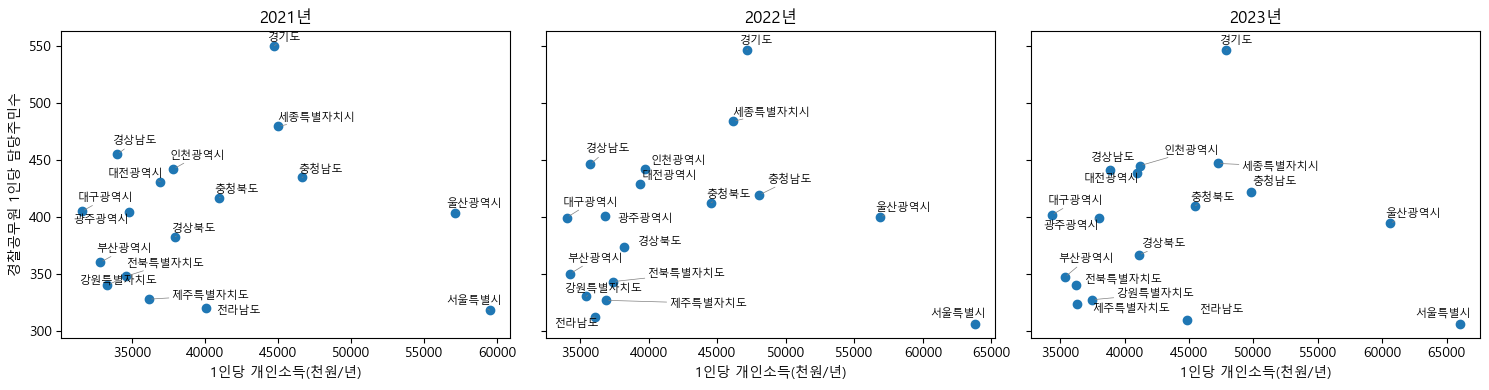

In [10]:
# 년도별로 3개의 그래프를 그렸습니다. 
# x축: 경찰공무원 1인당 담당주민수
# y축: 인구 천명당 범죄 발생 건수

years = ['2021', '2022', '2023']
police_rate[years] = police_rate[years].astype(float)
money_df[years]   = money_df[years].astype(float)
names = money_df['시도별']

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

for ax, year in zip(axes, years):
    x = money_df[year]
    y = police_rate[year]

    ax.scatter(x, y)

    # 점 라벨들 모아서 한 번에 조정
    texts = []
    for xi, yi, label in zip(x, y, names):
        t = ax.text(xi, yi, label,
                    fontsize=8,
                    ha='center', va='bottom')
        texts.append(t)

    # ★ 자동으로 겹치지 않게 위치 조정
    adjust_text(texts, ax=ax,
                arrowprops=dict(arrowstyle='-', lw=0.5, color='gray'))

    ax.set_title(f'{year}년')
    ax.set_xlabel('1인당 개인소득(천원/년)')

axes[0].set_ylabel('경찰공무원 1인당 담당주민수')
plt.tight_layout()
plt.show()

In [9]:
#상관계수 
for year in years:
    print(year, np.corrcoef(money_df[year], police_rate[year])[0,1])

2021 0.06401439470304503
2022 0.09638701681206212
2023 0.022631050670121923


### 지역 간 경찰 인력 격차가 꽤 크다

세 연도 모두 대략

낮은 지역: 1인당 담당 주민 수가 약 300명대 초반

높은 지역: 약 500명대 중반

까지 차이가 나는 것처럼 보입니다.
즉, 같은 1명 경찰이 맡는 인원수가 약 1.5~1.8배 차이 나는 수준이라,
지역별 경찰 인력 배치에 상당한 불균형이 있다는 걸 시각적으로 보여줍니다.

### ‘소득 수준’과 경찰 1인당 담당 주민 수는 뚜렷한 직선 관계가 아니다

소득이 높은 서울은 담당 주민 수가 아주 많지도, 아주 적지도 않은 중간~조금 낮은 편

소득이 중간~상위권인 경기도는 오히려 담당 주민 수가 가장 많은 축

소득이 중간이거나 다소 낮은 지방 도 중에는
담당 주민 수가 적은 지역도 눈에 띕니다.

그래프 세 장을 같이 봤을 때:

소득이 높다고 경찰 인력이 충분하다거나

소득이 낮다고 경찰 인력이 항상 부족하다

같은 단순한 패턴은 잘 보이지 않습니다.